In [77]:
# Make code toggle-able for easier review.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a></i>.''')

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Load the Olympics data from Kaggle 
data = pd.read_csv('OlympicData.csv')

# S 1.3.3 Drill - Present the Same Data Multiple Ways
### Sam Fradkin

The dataset I chose to use was a collection of Olympic data over a 120-year period from 1896 to 2016. 
Let's take a look at the first few rows of the dataset.

In [56]:
# Cursory look at the dataset
num_of_rows, num_of_cols = data.shape
print(f"The dataframe shape is: {num_of_cols} columns by {num_of_rows} rows")

data.head(3)

The dataframe shape is: 15 columns by 206165 rows


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [37]:
# Remove all rows with null values from the Age, Height, Weight, and Year columns
data = data[np.isfinite(data['Age'])]
data = data[np.isfinite(data['Height'])]
data = data[np.isfinite(data['Weight'])]
data = data[np.isfinite(data['Year'])]

Here we plot one variable, Age, in four different ways

In [41]:
# Round Age values to whole numbers
data['Age'] = data['Age'].round(0)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


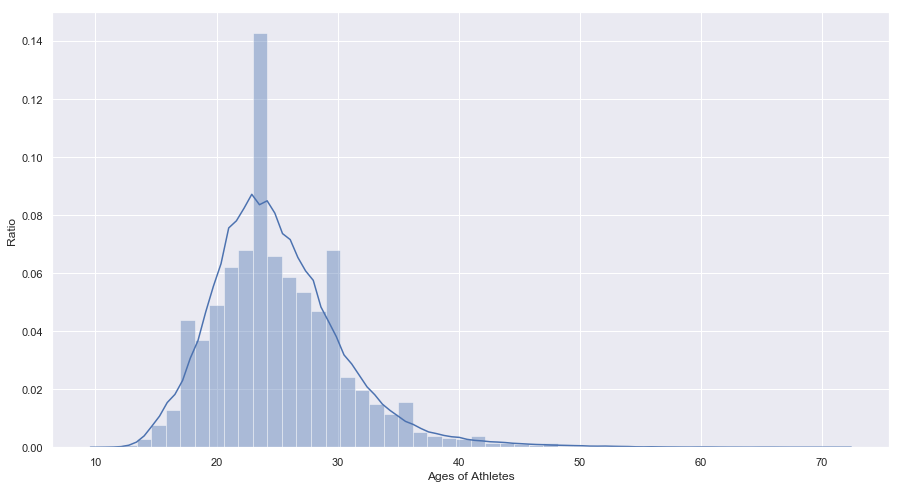

In [42]:
# Let's see the distribution of the trip durations
plt.figure(figsize=(15,8))
sns.distplot(data['Age'])
plt.xlabel("Ages of Athletes")
plt.ylabel("Ratio")
plt.show()

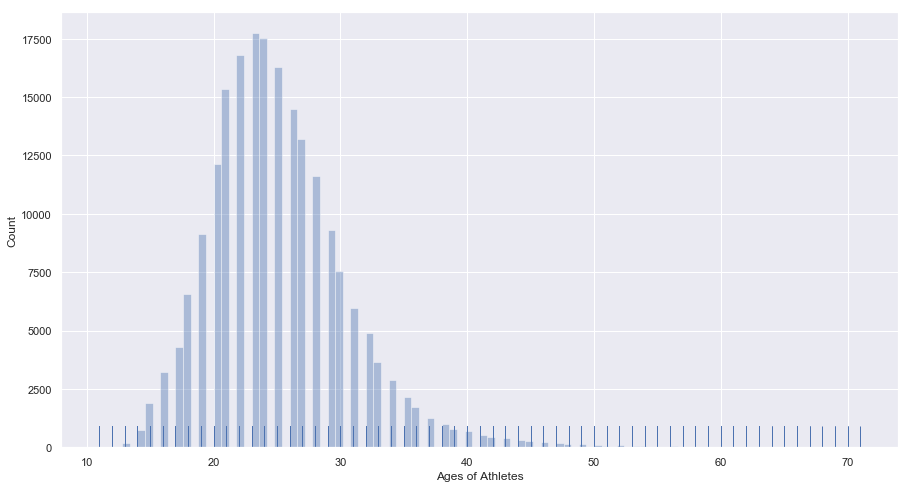

In [43]:
plt.figure(figsize=(15,8))
sns.set()
sns.distplot(data['Age'], bins=100, kde=False, rug=True)
plt.xlabel("Ages of Athletes")
plt.ylabel("Count")
plt.show()

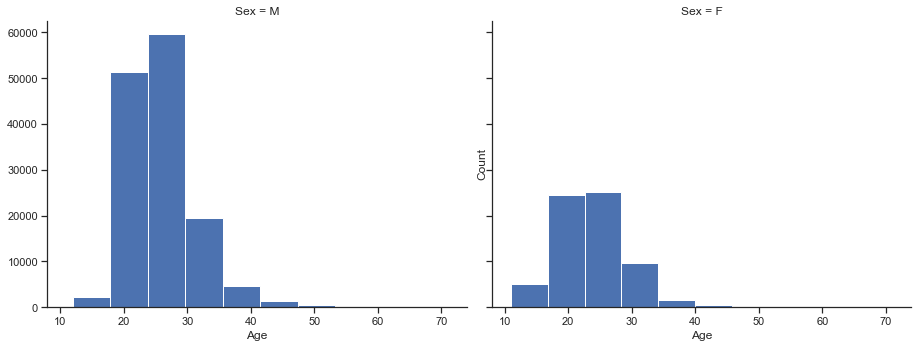

In [44]:
# Now let's try a side-by-side facet grid of Age split by Gender
sns.set(style="ticks")
g = sns.FacetGrid(data, col="Sex", height=5, aspect=1.3)
g = (g.map(plt.hist, "Age"))
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


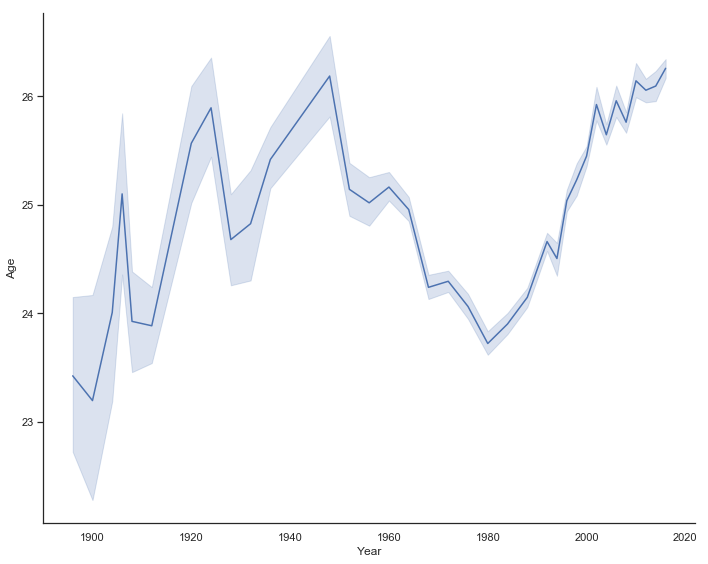

In [45]:
sns.set_style({'xtick.bottom': False})
g = sns.relplot(x="Year", y="Age", kind="line", data=data, height=8, aspect=1.25)

Here we plot two continuous variables, Year and Age, in three different ways

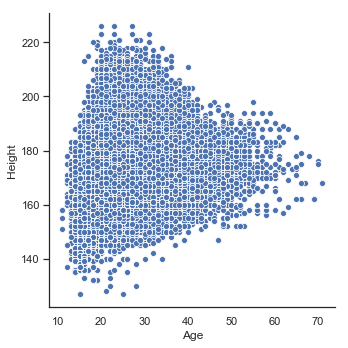

In [46]:
# Plotting 2 continuous variables - Age and Height
sns.relplot(x="Age", y="Height", data=data)

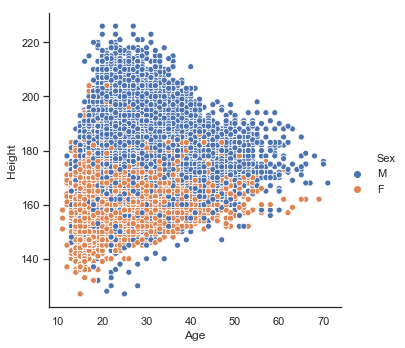

In [47]:
# Showing Gender too
sns.relplot(x="Age", y="Height", hue="Sex", data=data);

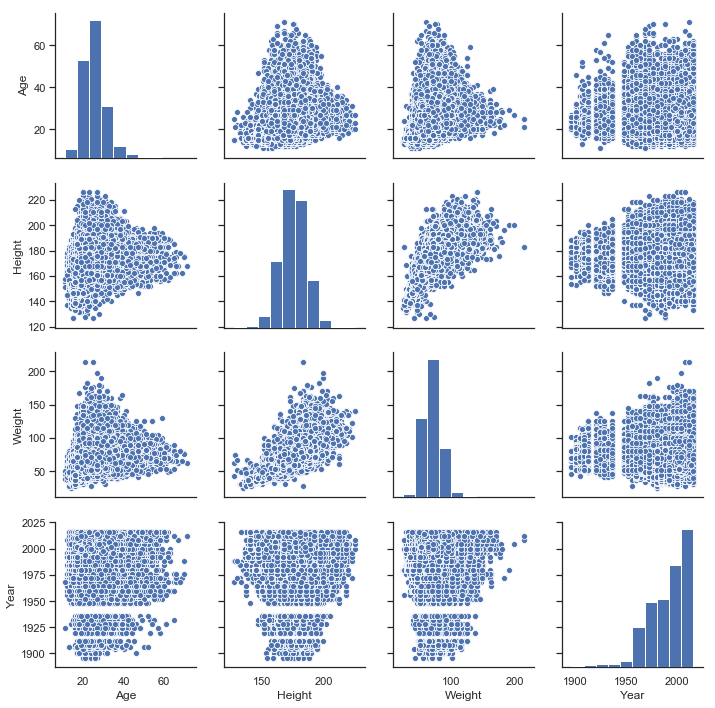

In [48]:
# Let's make a pair plot showing how Age, Height, Weight, and Olympic Year correlate
sns.pairplot(data[['Age', 'Height', 'Weight', 'Year']])

Here we plot one continuous variable, Age, and one categorical variable, Sport, in three different ways

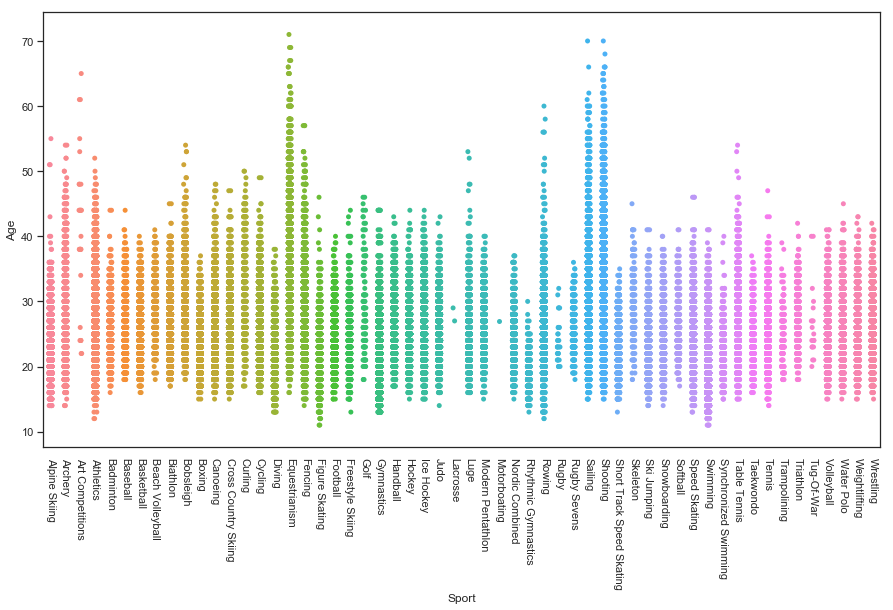

In [69]:
SportSort = data.sort_values('Sport', ascending=True)
plt.subplots(figsize=[15, 8])
plt.xticks(rotation=270)
sns.stripplot(data=SportSort, y='Age', x='Sport')

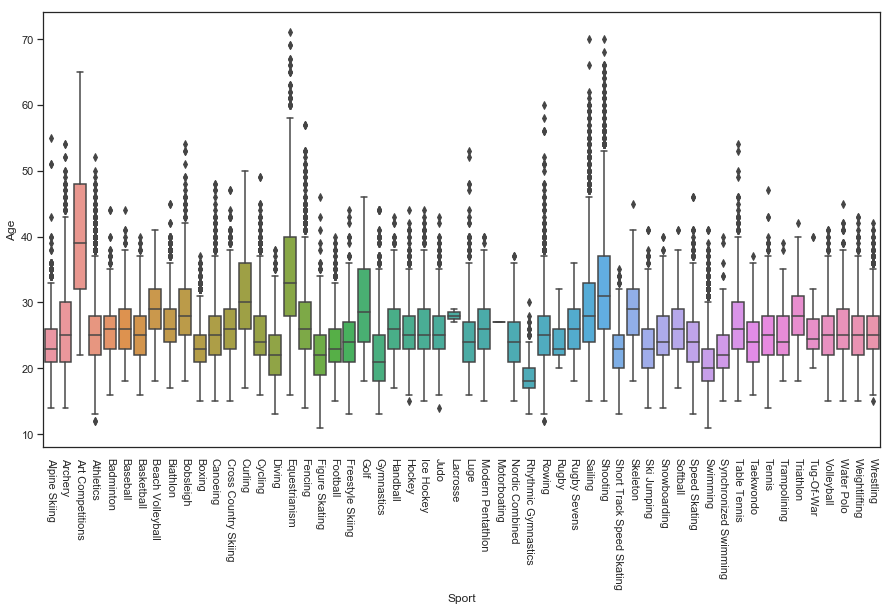

In [73]:
plt.subplots(figsize=[15, 8])
plt.xticks(rotation=270)
sns.boxplot(data=SportSort, y='Age', x='Sport')

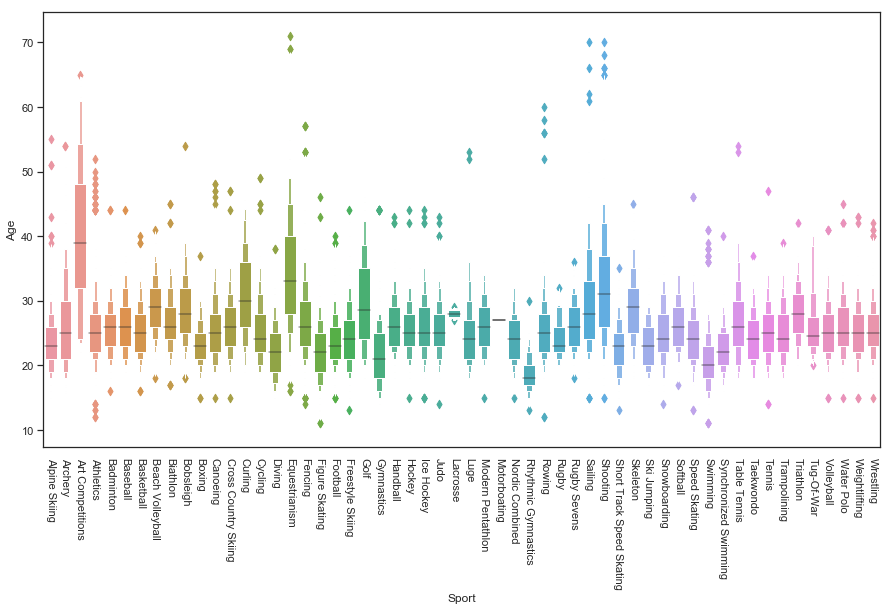

In [75]:
plt.subplots(figsize=[15, 8])
plt.xticks(rotation=270)
sns.boxenplot(data=SportSort, y='Age', x='Sport')

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


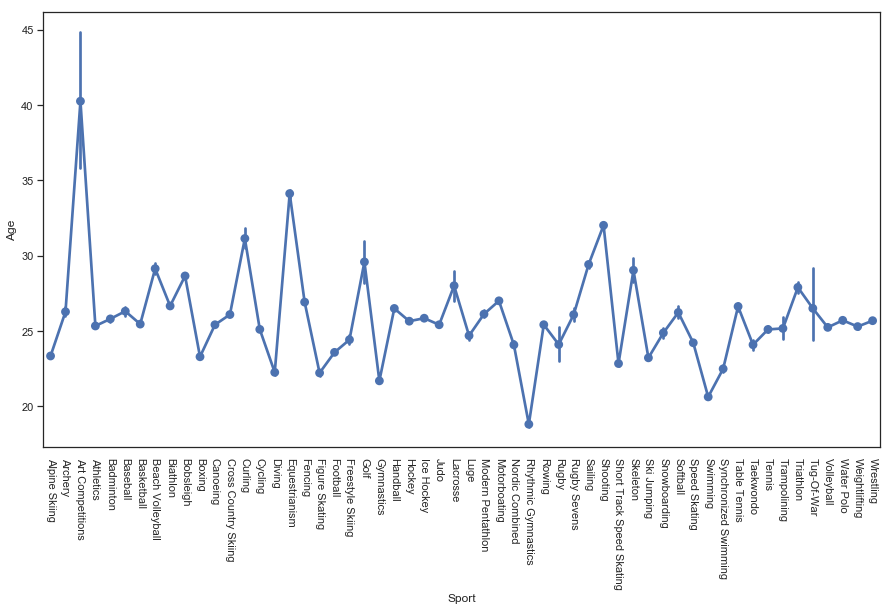

In [76]:
plt.subplots(figsize=[15, 8])
plt.xticks(rotation=270)
sns.pointplot(data=SportSort, y='Age', x='Sport')